<a href="https://colab.research.google.com/github/Tilak46-R/Customer-segmentation-using-unsupervised-learning/blob/main/Customer_segmentation_using_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITLE : CUSTOMER SEGMENTATION USING UNSUPERVISED LEARNING**




# **NAME : TILAK**

# **COHORT : SANTIAGO**

# **TYPE:INDIVIDUAL**

### **What is customer segmentation?**

#### Customer segmentation is a way to split customers into groups based on certain characteristics that those customers share. All customers share the common need of your product or service, but beyond that, there are distinct demographic differences (i.e., age, gender) and they tend to have additional socio-economic, lifestyle, or other behavioral differences that can be useful to the organization.


### **Why segment customers?**

#### Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development. Specifically, segmentation helps a company:

  * Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others (who will receive messages tailored to their needs and interests, instead).
  * Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment.
  * Identify ways to improve products or new product or service opportunities.
  * Establish better customer relationships.
  * Test pricing options.
  * Focus on the most profitable customers.
  * Improve customer service.
  * Upsell and cross-sell other products and services.

### <b> Problem Description: </b>

#### In this case study, our task was to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### <b> Data Description: </b>

#### <b>Attribute Information: </b>

* #### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* #### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* #### Description: Product (item) name. Nominal.
* #### Quantity: The quantities of each product (item) per transaction. Numeric.
* #### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* #### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* #### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* #### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
#IMPORT THE LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

In [3]:
# load the dataset

df = pd.read_csv('/content/Online Retail.csv')

In [4]:
cust_data = df.copy()

In [5]:
cust_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
cust_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12-09-2011 12:50,4.95,12680.0,France


In [7]:
cust_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
cust_data.shape

(541909, 8)

In [9]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
cust_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
cust_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

We can see that invoice no is in object format we need to convert that to date format

# **Handling missing values and Duplicates in the dataset**

In [15]:
cust_data.duplicated().sum()

5268

We can see that there are 5268 duplicate values we need to eliminate them

In [16]:
cust_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We can see that there are 1454 and 135080 null values in Description and cutomer id feature we need to eliminate them

Removal of duplicates and null values

In [18]:
cust_data.drop_duplicates(inplace = True)
cust_data.dropna(inplace = True)

In [19]:
cust_data.duplicated().sum()

0

In [20]:
cust_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [22]:
cust_data.shape

(401604, 8)

Earlier the shape of the dataset was (541909, 8) and now after removal of null and duplicate values it has been reduced to (401604,8)

# **Removal of Cancelled Orders**

In [23]:
cust_data['InvoiceNo'] = cust_data['InvoiceNo'].astype('str')
cust_data[cust_data['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12-01-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12-01-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12-01-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12-09-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12-09-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12-09-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12-09-2011 11:58,1.25,17315.0,United Kingdom


We can see there are 8872 orders which are cancelled and still present in the dataset hence we need to remove them

In [24]:
cust_data = cust_data[~cust_data['InvoiceNo'].str.startswith('C')]

In [25]:
cust_data.shape

(392732, 8)

Earlier the shape of the dataset was (401604,8) and now after removal of cancelled orders it has been reduced to (392732, 8)

In [26]:
cust_data.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


We can see that the min values are now positive but the unitprice here cannot be 0 because it results in free distribution

In [27]:
# check the columns having zero unit price

cust_data[cust_data['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12-05-2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/10 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/10 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,01-06-2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,01-06-2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/11 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,02-10-2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/11 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/11 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,04-04-2011 14:42,0.0,14410.0,United Kingdom


There are some values which has 0 unit price we need to drop them.

In [28]:
cust_data = cust_data[cust_data['UnitPrice']>0]

cust_data.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [29]:
cust_data['UnitPrice'].describe()

count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

We can see that the min value of unit price is slightly changed..


In [30]:
cust_data.shape

(392692, 8)

The data is almost cleaned and ready for EDA

# **Feature Engineering**

#### Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

In this dataset the features and not sufficient to go for an EDA hence we will create some new features

In [55]:
cust_data.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,12-01-2010 09:37,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,12-01-2010 09:37,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,12-01-2010 09:37,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,12-01-2010 09:37,0.55,14688.0,United Kingdom


In [54]:
cust_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540387,581478,23082,SET 6 PAPER TABLE LANTERN HEARTS,6,12-09-2011 08:59,3.75,17364.0,United Kingdom
540388,581478,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,24,12-09-2011 08:59,0.85,17364.0,United Kingdom
540389,581479,22087,PAPER BUNTING WHITE LACE,10,12-09-2011 09:00,2.95,17364.0,United Kingdom
540390,581480,23463,VINTAGE ZINC WATERING CAN,2,12-09-2011 09:07,9.95,14441.0,United Kingdom
540391,581480,23464,VINTAGE ZINC WATERING CAN SMALL,4,12-09-2011 09:07,4.95,14441.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [61]:
cust_data['InvoiceDate'] = cust_data['InvoiceDate'].apply(lambda x: pd.to_datetime(x))

In [64]:
cust_data['InvoiceDate'].dtypes

dtype('<M8[ns]')

In [65]:
# create some new features from invoice date
cust_data['day'] = cust_data['InvoiceDate'].dt.day_name()
cust_data['year'] = cust_data['InvoiceDate'].apply(lambda x: x.year)
cust_data['month_num'] = cust_data['InvoiceDate'].apply(lambda x: x.month)
cust_data['day_num'] = cust_data['InvoiceDate'].apply(lambda x: x.day)
cust_data['hour'] = cust_data['InvoiceDate'].apply(lambda x: x.hour)
cust_data['minute'] = cust_data['InvoiceDate'].apply(lambda x: x.minute)
cust_data['month'] = cust_data['InvoiceDate'].dt.month_name()

In [66]:
cust_data['Tota_amount'] = cust_data['UnitPrice']*cust_data['Quantity']

In [67]:
cust_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,Tota_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34


# **Exploratory Data Analysis**


What is Exploratory Data Analysis (EDA) ?

EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like: – main features of data – variables and relationships that hold between them – identifying which variables are important for our problem We shall look at various exploratory data analysis methods like:

Descriptive Statistics, which is a way of giving a brief overview of the dataset we are dealing with, including some measures and features of the sample Grouping data [Basic grouping with group by]

ANOVA, Analysis Of Variance, which is a computational method to divide variations in an observations set into different components.

Correlation and correlation methods

# **1. MOST SOLD PRODUCTS**

In [82]:
most_sold = cust_data['Description'].value_counts().reset_index()
most_sold.rename(columns = {'index':'Product_Name','Description':'No_of_items_Count'}, inplace =True)
most = most_sold.head()

In [83]:
most

,Product_Name,No_of_items_Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


<ipython-input-111-d693193e060e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Name',y='No_of_items_Count', data = most,palette='viridis')


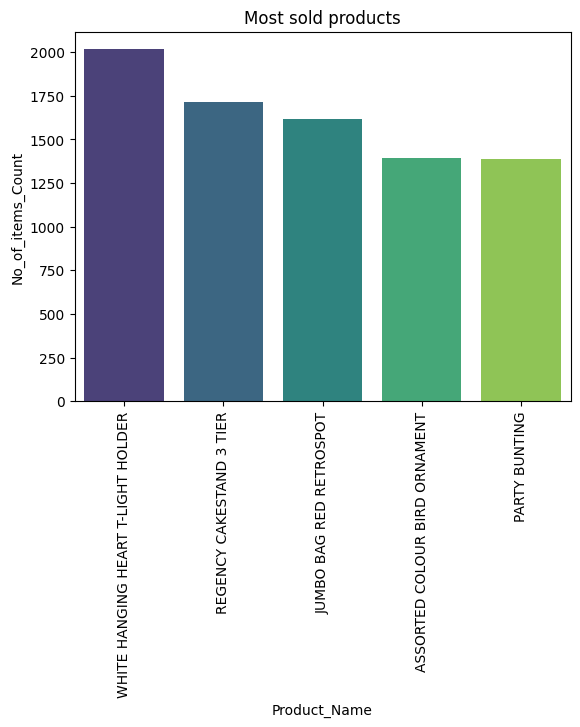

In [111]:
sns.barplot(x='Product_Name',y='No_of_items_Count', data = most,palette='viridis')
plt.title("Most sold products")
plt.xticks(rotation = 90)
plt.show()

The Five most sold products are:

1.WHITE HANGING HEART T-LIGHT HOLDER(2016)

2.REGENCY CAKESTAND 3 TIER(1713)

3.JUMBO BAG RED RETROSPOT(1615)

4.ASSORTED COLOUR BIRD ORNAMENT(1395)

5.PARTY BUNTING(1389)

In [84]:
least = most_sold.tail()

<ipython-input-115-caf63a19b1b1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Name',y='No_of_items_Count', data = least,palette='viridis')


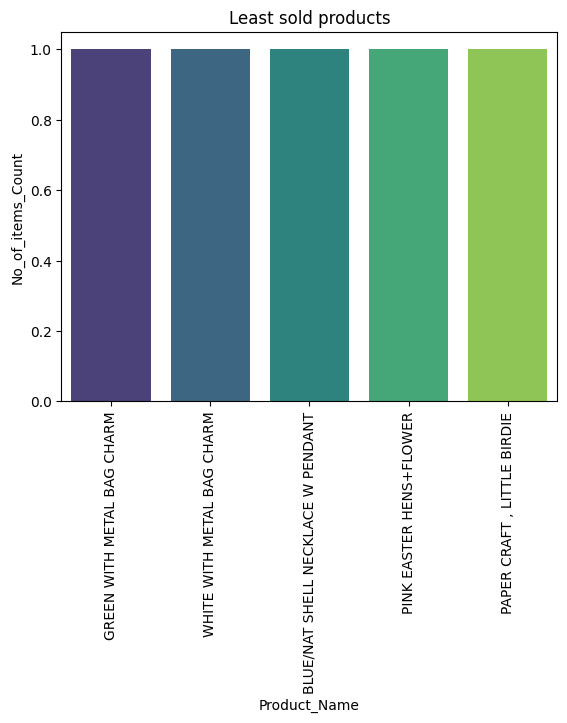

In [115]:
sns.barplot(x='Product_Name',y='No_of_items_Count', data = least,palette='viridis')
plt.title("Least sold products")
plt.xticks(rotation = 90)
plt.show()

The least sold products are :    

1.Green with metal bag charm

2.White with metal bag charm and so on..


# **COUNTRY WITH HIGHEST NUMBER OF CUSTOMERS**

In [98]:
Country = cust_data['Country'].value_counts().reset_index()
Country.rename(columns = {'index':'Country_Name','Country':'No_of_Customers'},inplace =True)
country_with_most = Country.head()

In [99]:
country_with_most

,Country_Name,No_of_Customers
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


<ipython-input-109-47664cfc3c97>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country_Name',y='No_of_Customers', data = country_with_most,palette='magma')


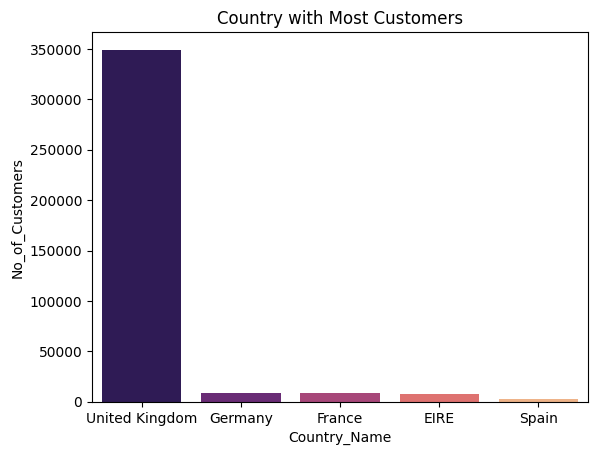

In [109]:
sns.barplot(x='Country_Name',y='No_of_Customers', data = country_with_most,palette='magma')
plt.title("Country with Most Customers")
plt.show()

We can see that majority of the customers are from United kingdom followed by small portions of Germany,France etc..

<ipython-input-108-77d00bd1d6b2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country_Name',y='No_of_Customers', data = Country.tail(),palette='magma')


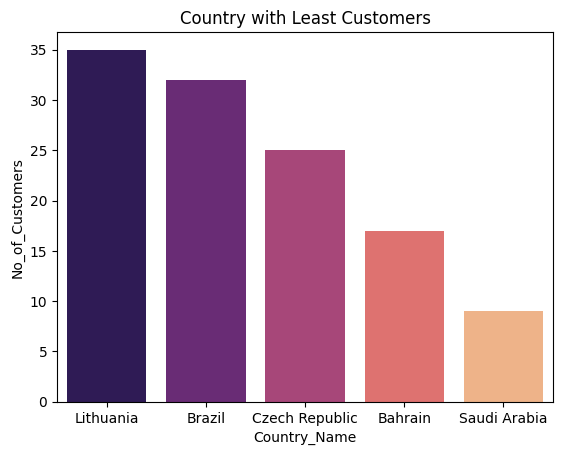

In [108]:
sns.barplot(x='Country_Name',y='No_of_Customers', data = Country.tail(),palette='magma')
plt.title("Country with Least Customers")
plt.show()

In [116]:
Unique_Cust = cust_data['CustomerID'].unique()

In [118]:
Unique_Cust.shape

(4338,)

We can see that there are only 4338 customers present and are responsible for all these transactions let us now understand the percentage share of the top 10 customers

In [124]:
percentage = (cust_data['CustomerID'].value_counts()/sum(cust_data['CustomerID'].value_counts())*100).reset_index()
percentage.columns = ['Customer ID', 'Percentage_share']
new = percentage.head().cumsum()
new.head()

,Customer ID,Percentage_share
0,17841.0,1.954713
1,32752.0,3.398592
2,46848.0,4.700121
3,59596.0,5.823648
4,74202.0,6.505353


<ipython-input-134-78b9607f558f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer ID',y='Percentage_share', data=percentage[:10].cumsum(),palette='Spectral')


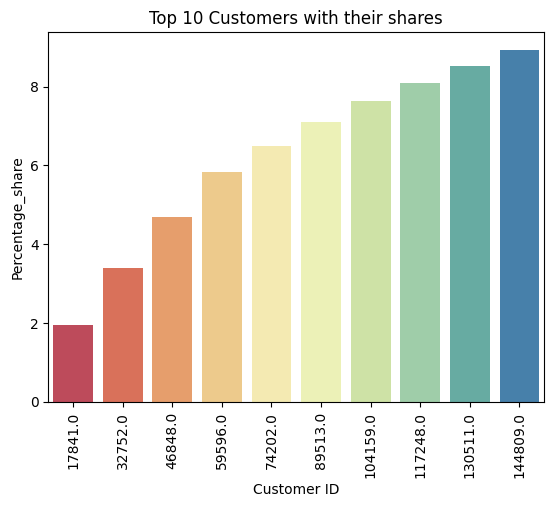

In [134]:
sns.barplot(x='Customer ID',y='Percentage_share', data=percentage[:10].cumsum(),palette='Spectral')
plt.title("Top 10 Customers with their shares")
plt.xticks(rotation = 90)
plt.show()

From the above figure we can infer that the top ten customers out of 4338 have contributed nearly 8 to 9% of total share.

We can infer them as big buyers or wholesalers.


In [ ]:
num_features = ['Quantity','UnitPrice','TotalAmount']
count=1
plt.subplots(figsize = (15,10))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.displot(cust_data[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

<ipython-input-136-f785cb1e94e9>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
<ipython-input-136-f785cb1e94e9>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
